In [7]:
# Uploading the required Libraries : pip, pandasql, pysqldf for incorporating sql commands in python.
# pandas and numpy for their data analysis abilities. 
# seaborn and matplotlib for their abilites of data visualization.

! python -m pip install --upgrade pip
! pip install -U pandasql
from pandasql import sqldf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from ggplot import *
from scipy import stats, integrate
def pysqldf(q):
    return sqldf(q, globals())
%matplotlib inline

Requirement already up-to-date: pip in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (10.0.1)
grpcio 1.11.0 has requirement protobuf>=3.5.0.post1, but you'll have protobuf 3.4.1 which is incompatible.
Requirement already up-to-date: pandasql in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (0.7.3)
Requirement not upgraded as not directly required: numpy in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (from pandasql) (1.14.3)
Requirement not upgraded as not directly required: pandas in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (from pandasql) (0.20.3)
Requirement not upgraded as not directly required: sqlalchemy in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (from pandasql) (1.1.13)
Requirement not upgraded as not directly required: python-dateutil>=2 in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (from pandas->pandasql) (2.6.1)
Requirement not upgraded as not directly required: pytz>=2011k in /home/nbuser/anaconda3_501/lib/

# DATA-SET DESCRIPTION.

#### The dataset is provided by data research wing of Zillow.com known as Zillow Research. It 
#### contains rows describing the median home values across United State .
#### The key indicator of the median home values is provided by ZHVI – Zillow Home Value Index, which is a smoothed, seasonally adjusted measure of the median estimated home value across a given region. 
#### The ZHVI is based of sales process for the same set of housed in each time period.
#### The data set has observations detailing the ZHVI and percent changes in the ZHVI on a month on month, quarter on quarter and on a year on year basis. It describes the percent changes in ZHVI from the ZHVI calculated 5 and 10 years earlier. The dataset maintains a record of the peak ZHVI and the peak month; peak Quarter of achieving that ZHVI. Lastly it also provides information about the percent fall of the current ZHVI from the peak ZHVI and the last date on which the current ZHVI was achieved.

In [8]:
# Fetching the data-set of Property prices in various States in United states from Zillow.

zillow = pd.read_csv("https://raw.githubusercontent.com/chrismetcalf/zillow-data/master/data/Metro/Metro_Zhvi_Summary_AllHomes.csv")
#zillow1 = pd.read_csv("https://raw.githubusercontent.com/chrismetcalf/zillow-data/master/data/Metro/Metro_Zhvi_Summary_AllHomes.csv").set_index('RegionName')

# sqldf is the library imported for using SQL commands in Python for the purpose of data manipualtion, and re-arrangement.

data = pysqldf("SELECT * FROM zillow LIMIT 10;")

# randon 10 samples are fetched to see the constituents of dataset.

data.sample(10)


,Date,RegionName,State,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
5,2014-11-30,"Philadelphia, PA",PA,5,203600,0.002462,0.008420,0.050026,-0.009079,0.005153,2007-05,2007-Q2,231700,-0.121278,2005-04
1,2014-11-30,"New York, NY",NY,1,382900,0.002618,0.009225,0.049041,0.003270,-0.001425,2006-08,2006-Q3,451300,-0.151562,2004-10
9,2014-11-30,"Atlanta, GA",GA,9,154000,0.006536,0.024617,0.128205,0.013941,-0.005419,2006-12,2006-Q4,174800,-0.118993,2002-12
0,2014-11-30,United States,None,0,177600,0.003390,0.011966,0.060299,0.011296,0.004916,2007-04,2007-Q2,196400,-0.095723,2005-05
2,2014-11-30,"Los Angeles, CA",CA,2,532200,0.005099,0.013714,0.064613,0.042215,0.004902,2006-07,2006-Q3,614200,-0.133507,2005-04
6,2014-11-30,"Houston, TX",TX,6,151800,0.004633,0.012000,0.119469,0.005627,0.016408,2014-11,2014-Q4,151800,0.000000,2014-11
7,2014-11-30,"Washington, DC",DC,7,361500,0.001663,0.005563,0.045704,0.028116,0.000973,2006-03,2006-Q1,431600,-0.162419,2004-12
4,2014-11-30,"Dallas-Fort Worth, TX",TX,4,150900,0.008016,0.020284,0.073257,0.026039,0.008684,2014-11,2014-Q4,150900,0.000000,2014-11
3,2014-11-30,"Chicago, IL",IL,3,188800,0.003188,0.012876,0.058296,-0.016138,-0.016863,2007-03,2007-Q1,244500,-0.227812,2002-08
8,2014-11-30,"Miami-Fort Lauderdale, FL",FL,8,208000,0.007752,0.024631,0.135991,0.052039,-0.008790,2006-06,2006-Q2,312300,-0.333974,2004-08


# DATA-CLEANSING

#### The mean and median of MOM, QOQ, YOY, X5Year, X10Year and PctFalFromPeak fields are almost similar. The data for these fields have a symmetrical distribution. While the mean and median for ZHVI and PeakZHVI are farther apart from each other.
#### The null or empty values are identified since the total number of rows consisting of null values account lesser than 10% of the dataset, these values(rows) are elimnated for purpose of having a clean dataset.
#### A few columns are changed for easier analysis.

In [9]:
# **Data Cleaning : identifying the null values and replacing them with the appropriate values**

#Count of Null values present in the dataset.
print(zillow.isnull().sum())

# checking th column names , and renaming them for easy analysis.
zillow.rename(columns = {'5Year':'FiveYear', '10Year':'TenYear', 'PeakMonth':'PeakM', 'PeakQuarter':'PeakQ'}, inplace=True)
print(zillow.columns)


Date                   0
RegionName             0
State                  1
SizeRank               0
Zhvi                   0
MoM                    0
QoQ                    0
YoY                    0
5Year                  8
10Year                37
PeakMonth              0
PeakQuarter            0
PeakZHVI               0
PctFallFromPeak        0
LastTimeAtCurrZHVI    25
dtype: int64
Index(['Date', 'RegionName', 'State', 'SizeRank', 'Zhvi', 'MoM', 'QoQ', 'YoY',
       'FiveYear', 'TenYear', 'PeakM', 'PeakQ', 'PeakZHVI', 'PctFallFromPeak',
       'LastTimeAtCurrZHVI'],
      dtype='object')


In [10]:
# Eliminating the rows with Null values.
zillow.dropna(subset = ['TenYear', 'FiveYear', 'State'], how='any', inplace=True)
print(zillow.shape)
print(zillow.isnull().sum())

(485, 15)
Date                  0
RegionName            0
State                 0
SizeRank              0
Zhvi                  0
MoM                   0
QoQ                   0
YoY                   0
FiveYear              0
TenYear               0
PeakM                 0
PeakQ                 0
PeakZHVI              0
PctFallFromPeak       0
LastTimeAtCurrZHVI    6
dtype: int64


#### The dataset was cleaned and analyzed to gather meaningful insights. 
#### SQLlike commands using library sqldf is used for data munging and data wrangling, ‘gglot’,is primarily used to create visualizations along with matplotlib and Seaborn.

#### The process of analyzing data sets, summarizing their main characteristics and present them visually is known  as Exploratory Data Analysis. EDA might contain a statistical model, but it primary purpose is to uncover trends and patterns beyond the formal modelling and hypothesis testing tasks. We have carried out an Exploratory Data Analysis for our Zillow Home Value Index dataset.

## Average ZHVI Growth over 5 Years – Dot Plot and Bar Plot  

#### A dot plot is statistical representation of data points having multiple values in a variable with each point being independent of the other. 

#### The States are plotted on the X-axis and the average 5 year growth percentage of the cities and states are plotted on the Y axis. #### The dot plot shows the top 10 cities and states with the highest growth rate over the last 5 years. 
#### An important factor to consider here is that the average growth rate is being taken which may drastically vary depending on the development of the cities and statesindependently. But when compared to a 10 year growth analysis these are gradual growths in the home values.
#### Cities have gradually grown in recent times. One possible explanation might be that a city might have a fairly lower index value 5 years ago and due to the recent developments the index grew very high increasing the average index value of the city.
#### For the overall growth within span of 5years in consideration, North Dakota is growing at fair amount due to above mentioned reasons, despite the higher Zhvi score being of Hawaii, for the obvious reasons of presence of Tourism.
#### Same facts are also clearly visible by pairplot visualization.

In [11]:
# Visualizing the trends of last five years growth for the various cities.

determine1 = pysqldf("SELECT RegionName AS w, State AS x, AVG(FiveYear) as y, Zhvi FROM zillow GROUP BY State ORDER BY avg(FiveYear) DESC LIMIT 10 ;")
print(determine1)

                  w   x         y    Zhvi
0      Bismarck, ND  ND  0.056405  255400
1         Kapaa, HI  HI  0.032928  489800
2       Shawnee, OK  OK  0.032668   87200
3  Grand Island, NE  NE  0.031493  134700
4    Susanville, CA  CA  0.031310  117800
5    Washington, DC  DC  0.028116  361500
6        Juneau, AK  AK  0.022103  315800
7    Big Rapids, MI  MI  0.021543   96100
8        Fallon, NV  NV  0.021251  143400
9      Sterling, CO  CO  0.018082  108500


AttributeError: module 'matplotlib' has no attribute 'show'

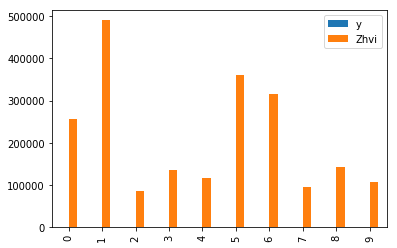

In [12]:
# Bar graph visualization of variations in Zhvi score.
determine1.plot(kind='bar')
plt.show()

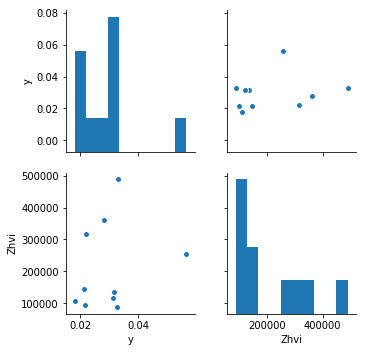

In [13]:
%matplotlib inline
sns.pairplot(determine1)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


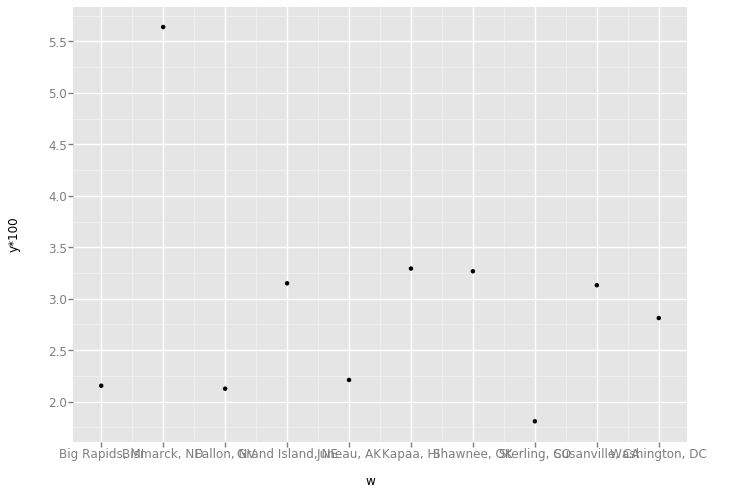

<ggplot: (-9223363244267981859)>

In [14]:
from ggplot import *
ggplot(determine1, aes(x='w', y='y*100')) +\
    geom_point()

#### The States are plotted on the X-axis and the average 10 year growth percentage of the cities and states are plotted on the Y axis. The dot plot shows the top 10 cities and states with the highest growth rate over the last 10 years.
#### The observation here can be made is that in the last ten years these cities have grown drastically. While at the state level there are other states that have grown drastically over last ten years because the states now have a very high ZHVI as compared to ten years ago. 
#### North Dakota has been an upcoming state in the last ten years followed by Oklahoma.  Other states like Kentucky, Utah and Iowa have grown due to the Professional Services, trade and food production industries respectively.
#### Despite the growth trend in last ten years show a different picture, the overall Zhvi rating ranks Alaska as the top followed by North Dakota and Utah. These trends are also visible through the pairplot as well. 

In [15]:
# Visualizing the trends of last Ten years growth for the various cities.
determine2 = pysqldf("SELECT RegionName AS w, State AS x, AVG(TenYear) as z, Zhvi FROM zillow GROUP BY State ORDER BY avg(TenYear) DESC LIMIT 10 ;")
print(determine2)

                   w   x         z    Zhvi
0       Bismarck, ND  ND  0.042924  255400
1        Shawnee, OK  OK  0.032577   87200
2    Great Falls, MT  MT  0.025946  151700
3     Burlington, IA  IA  0.024570   96400
4         Juneau, AK  AK  0.024462  315800
5         Casper, WY  WY  0.024006  180900
6  Mountain Home, AR  AR  0.022697  107400
7   Grand Island, NE  NE  0.021244  134700
8     St. George, UT  UT  0.020861  205400
9         Oxford, MS  MS  0.020713  169900


AttributeError: module 'matplotlib' has no attribute 'show'

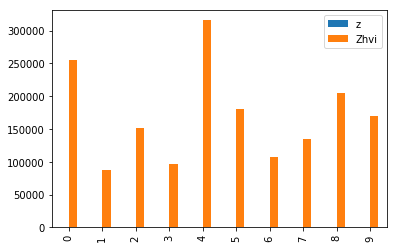

In [16]:
# Bar graph visualization of Zhvi score.
determine2.plot(kind='bar')
plt.show()

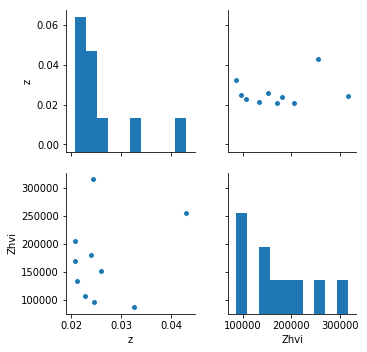

In [17]:
%matplotlib inline
sns.pairplot(determine2)

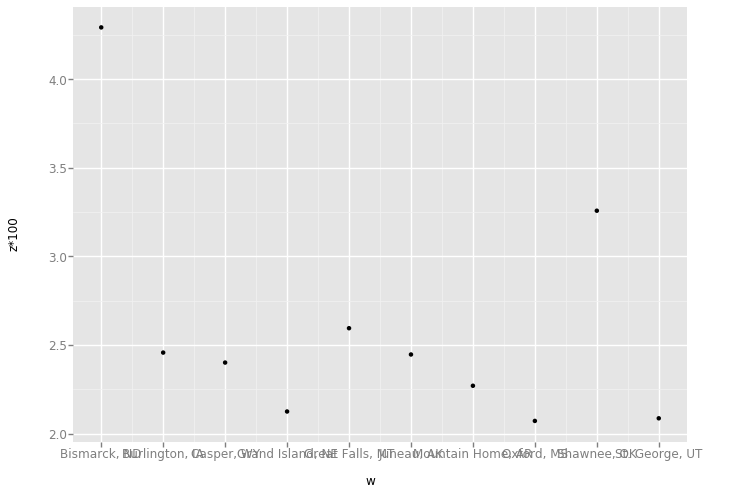

<ggplot: (-9223363244270326766)>

In [18]:
#from ggplot import *
ggplot(determine2, aes(x='w', y='z*100')) +\
    geom_point()

In [19]:
# Visualizing and Analyzing the trends of Monthly Peak values attained by Zhvi score for the various cities.
determine3 = pysqldf("SELECT PeakM, State AS x, count(PeakM) as PeakMCount, avg(Zhvi) FROM zillow GROUP BY PeakM ORDER BY count(PeakM) DESC LIMIT 100 ;")
print(determine3.sample(5))

      PeakM   x  PeakMCount      avg(Zhvi)
0   2014-11  TN          82  158791.463415
1   2006-04  CA          15  242026.666667
2   2006-05  NV          14  238442.857143
3   2006-07  NV          14  181564.285714
4   2007-05  CO          14  167014.285714
5   2006-03  VA          13  187100.000000
6   2005-12  NV          12  247425.000000
7   2006-02  IN          11  220554.545455
8   2006-06  FL          11  171936.363636
9   2007-06  AK          11  169754.545455
10  2006-08  MD           9  218911.111111
11  2006-09  IN           9  172477.777778
12  2006-11  FL           9  167833.333333
13  2007-03  OH           9  155522.222222
14  2009-06  MT           9  166788.888889
15  2005-11  IN           8  159787.500000
16  2006-10  MD           8  129500.000000
17  2007-07  OH           8  175775.000000
18  2005-10  IN           7  258942.857143
19  2007-10  AR           7  150614.285714
20  2008-01  CO           7  185542.857143
21  2005-06  IN           6  105150.000000
22  2006-01

#### One key parameter while determining the trend in the housing market are the months that had the highest peak occurrences in the ZHVI index values during the 14 year span. X-Axis represents the count of peaks in the market with the time period on the Y-Axis.
#### During the late 2000’s the housing market was at very good condition but with the financial crisis caused due to the mortgage market the index values dropped. The recovery and regrowth was seen by early 2015 and has been on an incline since. Currently, cities like Los Angeles and New York City have their highest peak month of February 2018 along with many other cities contributing to the count to 4481.

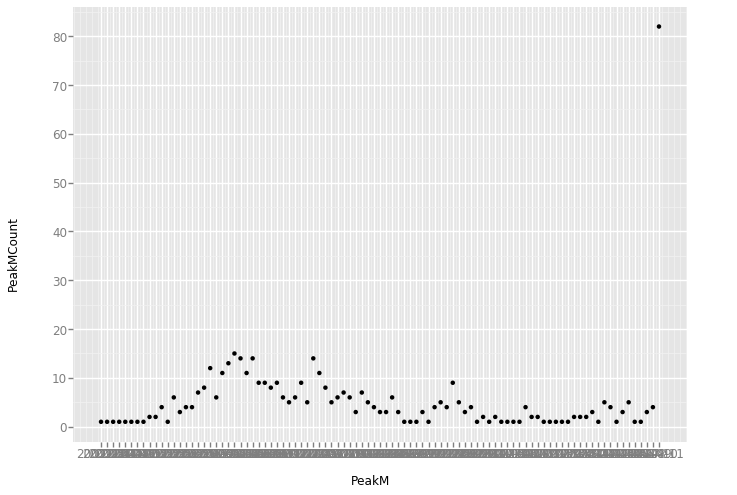

<ggplot: (-9223363244269334044)>

In [20]:
ggplot(determine3, aes(x='PeakM', y='PeakMCount')) + \
    geom_point() 

In [21]:
top_states = data.loc[:,'State']
print(top_states)

0    None
1      NY
2      CA
3      IL
4      TX
5      PA
6      TX
7      DC
8      FL
9      GA
Name: State, dtype: object


#### Correlation Matrix is used to investigate the dependence between multiple variables at the same time. It is a basically a table containing the correlation coefficients between each variable and the others. Correlation is used to evaluate the association between two or more variables.
#### The correlation coefficient r measures the strength and direction of linear relationship between two variables. the value is always between +1 and -1.

In [23]:
zillow.corr()

,SizeRank,Zhvi,MoM,QoQ,YoY,FiveYear,TenYear,PeakZHVI,PctFallFromPeak
SizeRank,1.000000,-0.275505,0.000385,0.044773,0.060021,-0.025779,0.076718,-0.257598,0.009916
Zhvi,-0.275505,1.000000,0.117871,0.112008,0.165251,0.282310,-0.017695,0.957355,-0.118368
MoM,0.000385,0.117871,1.000000,0.860644,0.510610,0.331027,-0.117020,0.137234,-0.063496
QoQ,0.044773,0.112008,0.860644,1.000000,0.637954,0.399405,-0.100033,0.136725,-0.061410
YoY,0.060021,0.165251,0.510610,0.637954,1.000000,0.565466,-0.047027,0.196604,-0.057054
FiveYear,-0.025779,0.282310,0.331027,0.399405,0.565466,1.000000,0.136829,0.242955,0.207715
TenYear,0.076718,-0.017695,-0.117020,-0.100033,-0.047027,0.136829,1.000000,-0.209025,0.727571
PeakZHVI,-0.257598,0.957355,0.137234,0.136725,0.196604,0.242955,-0.209025,1.000000,-0.367869
PctFallFromPeak,0.009916,-0.118368,-0.063496,-0.061410,-0.057054,0.207715,0.727571,-0.367869,1.000000


#### ZHVI is positively correlated to variables that describe the changes in ZHVI over time including MoM, QoQ, YoY, FiveYear, TenYear. 
#### These variables are also positively correlated to each other. The strongest correlation is between ZHVI & FiveYear and TenYear.
#### The MoM has a very high correlation with QoQ (.86) and similarly QoQ is highly correlated with YoY (.64). The positive growth in MoM and QoQ ZHVI value leads to a  positive growth in QoQ and YoY values. YoY ,FiveYear and TenYear also have a high correlation among themselves.
#### The PctFallFromPeak describes the difference in percentage between the current ZHVI value and Peak ZHVI value. The negative value of PctFallFromPeak indicates the decrease in ZHVI value as compared to Peak ZHVI and vice versa. 
#### The TenYear and PctFallFromPeak are strongly correlated to each other (.72). The increase in growth of ZHVI value over 10 Years leads to the increase in current ZHVI value which in turn leads to a positive percent change in PctFallFromPeak value.

## Conclusion 

#### While ZHVI is a nice indicator of United States Real Estate Housing Market. This index is calculated taking into consideration various financial, economic and many other factors. While this is a useful indicator of the trends in the market, this data alone does not paint the correct picture. Additional data including historical housing prices, mortgage, rental, population density, spending habits can be combined with the ZHVI data to generate accurate insights. 